unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

(1920, 1080)


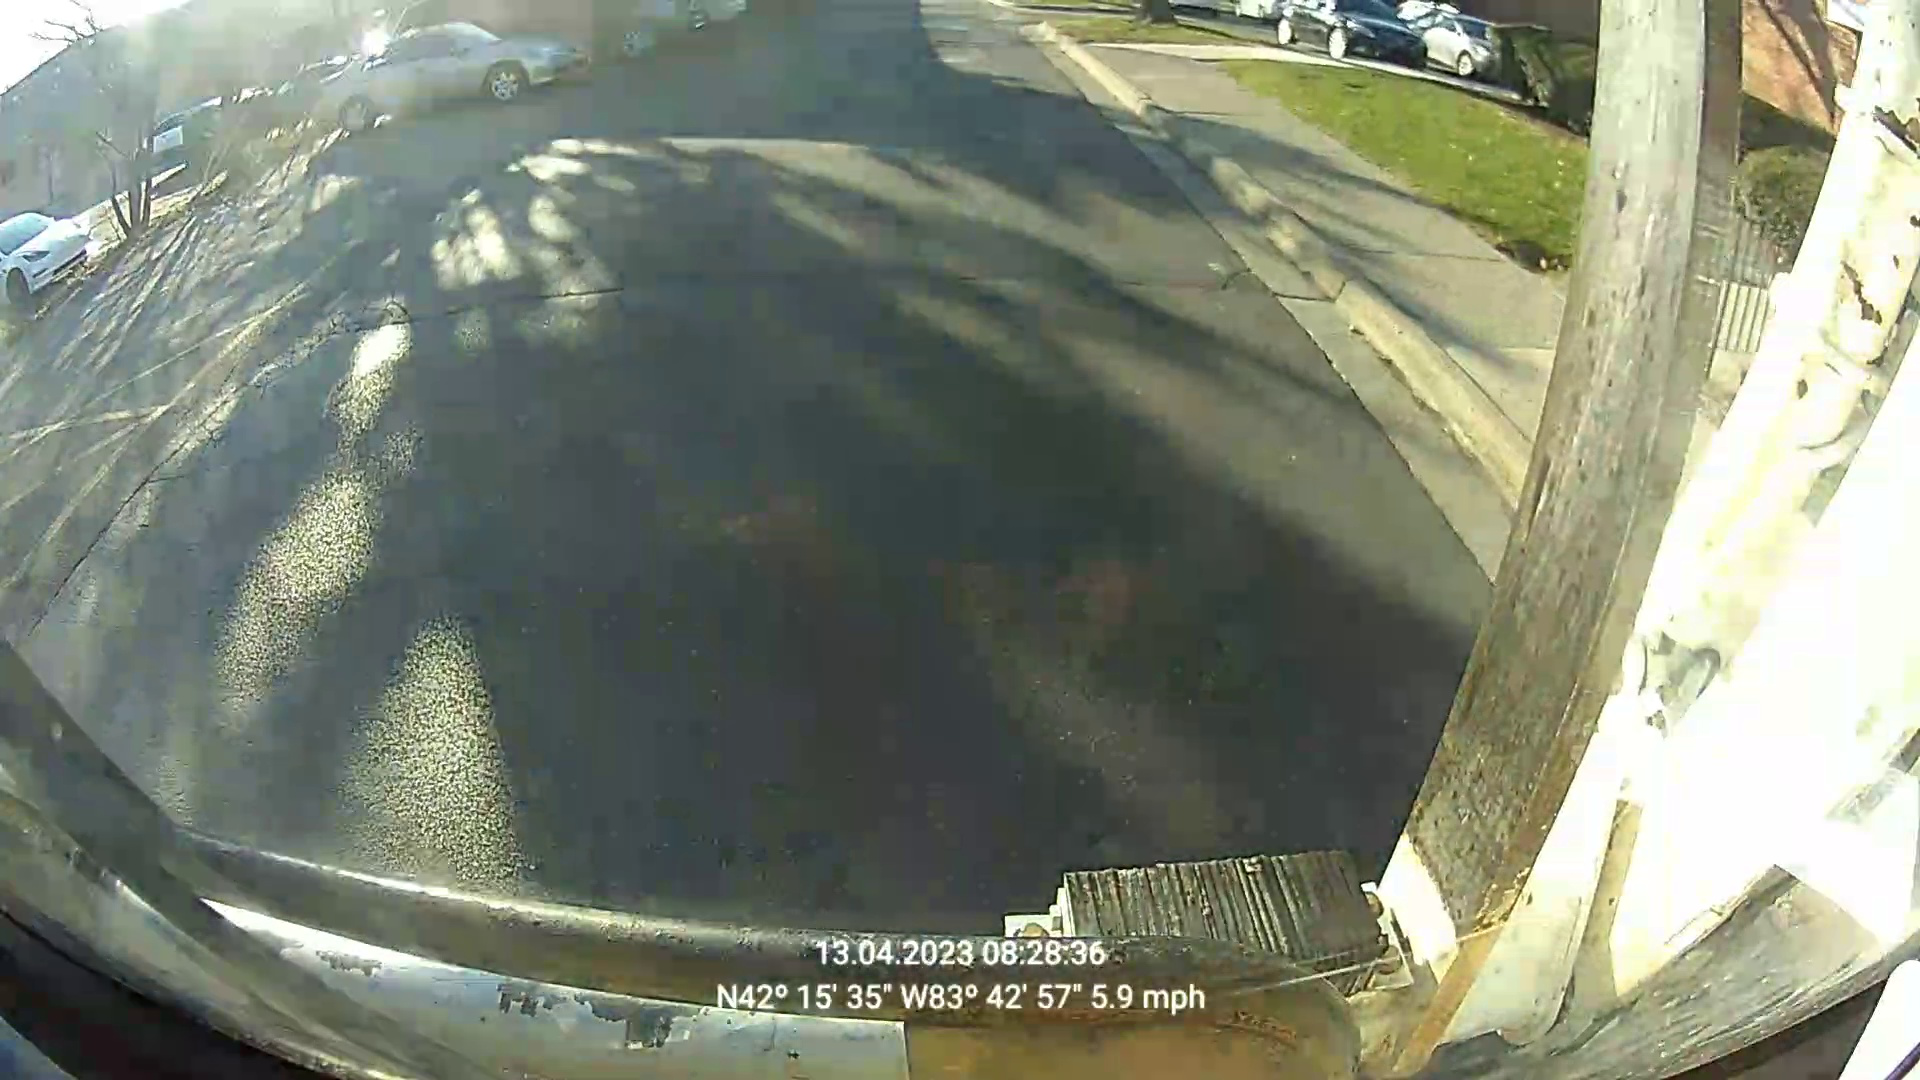

(240, 135)


  0%|          | 0/75 [00:00<?, ?it/s]

(960, 528)


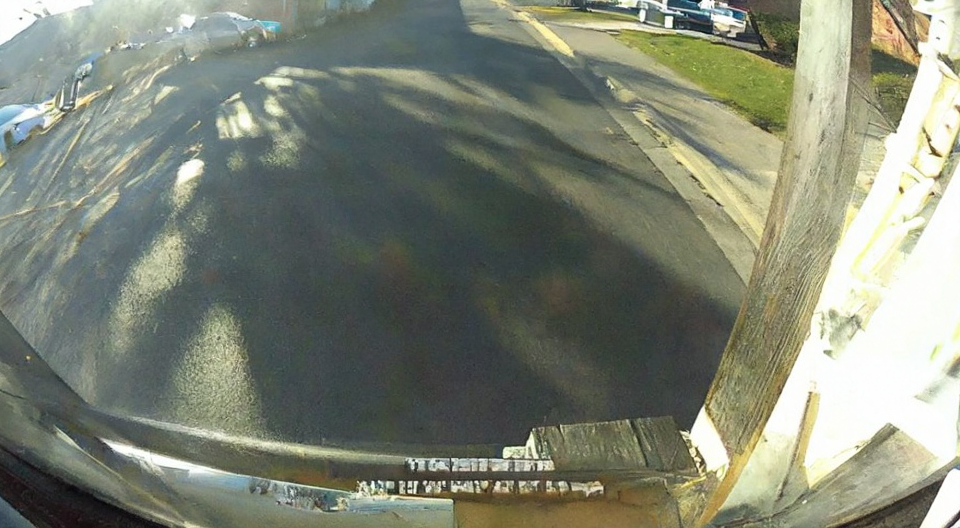

In [2]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch

torch.cuda.set_device(torch.device("cuda:3"))

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

# let's download an  image
low_res_img = Image.open("/data/noah/inference/meaa/real_2.png").convert("RGB")
print(low_res_img.size)
display(low_res_img)
low_res_img = low_res_img.resize((low_res_img.width // 8, low_res_img.height // 8))
# low_res_img.thumbnail((512, 512), Image.ANTIALIAS)
# low_res_img.resize((512, 512))
print(low_res_img.size)
prompt = "a road view"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
print(upscaled_image.size)
display(upscaled_image)